# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from projetannuel import SVM, SVMKernelType
import projetannuel

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      1
])

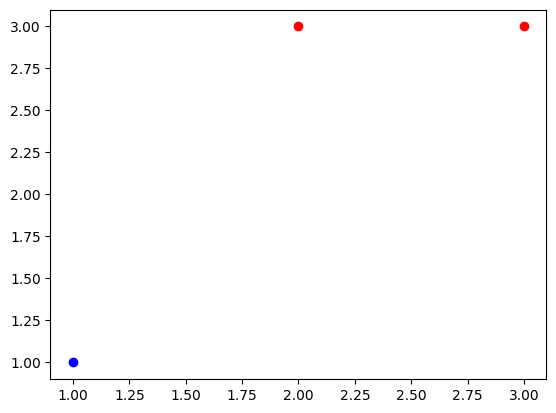

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

# RBF

In [4]:
import projetannuel

In [5]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 1
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo = "gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


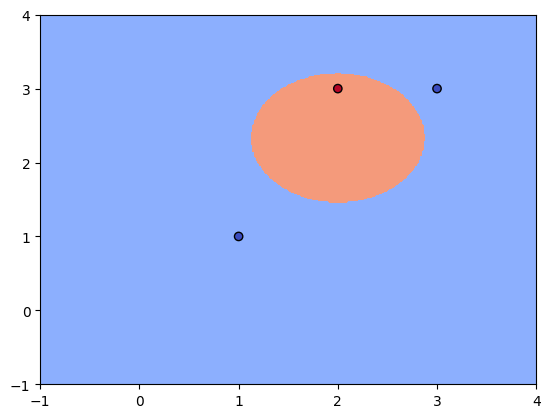

<Figure size 640x480 with 0 Axes>

In [6]:
xx, yy = np.meshgrid(np.linspace(-1, 4, 300), np.linspace(-1, 4, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()


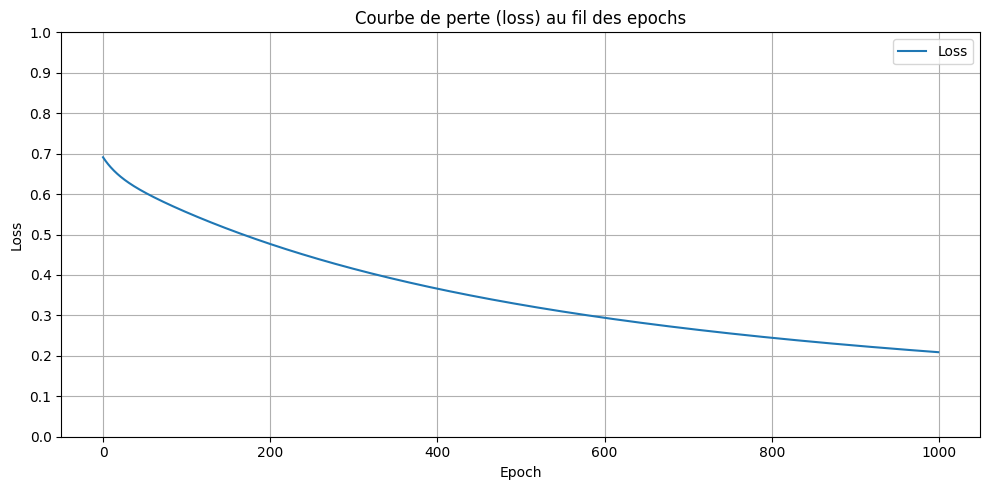

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [8]:
model = SVM(SVMKernelType.Linear())
model.train(X.tolist(), Y.tolist())

In [9]:
Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


Accuracy Score : 1.0


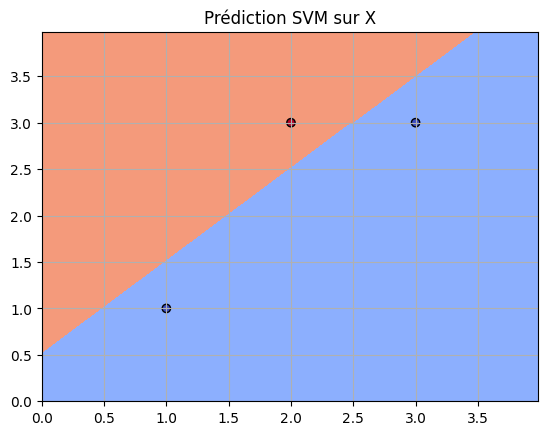

In [10]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm_r', edgecolors='k')
plt.title("Prédiction SVM sur X")
plt.grid(True)
plt.show()


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [11]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

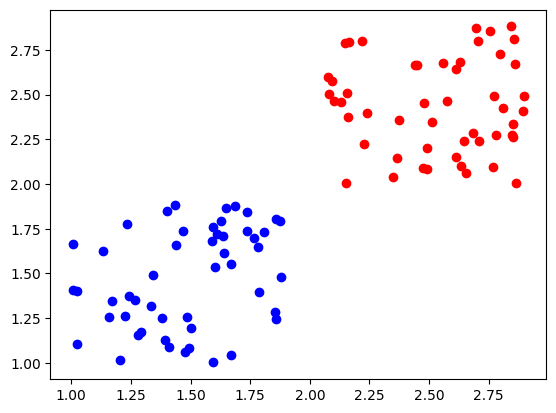

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

# RBF

In [13]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma=1,
    k=2
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


C:\Users\leopo\AppData\Local\Temp\ipykernel_15296\1043488661.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = projetannuel.float_labels(Y)
C:\Users\leopo\AppData\Local\Temp\ipykernel_15296\1043488661.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


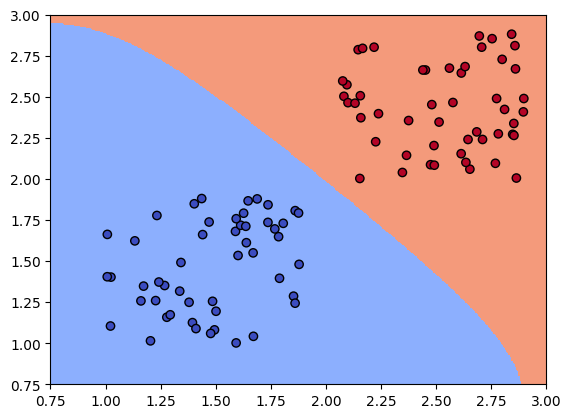

<Figure size 640x480 with 0 Axes>

In [14]:
xx, yy = np.meshgrid(np.linspace(0.75, 3, 300), np.linspace(0.75, 3, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

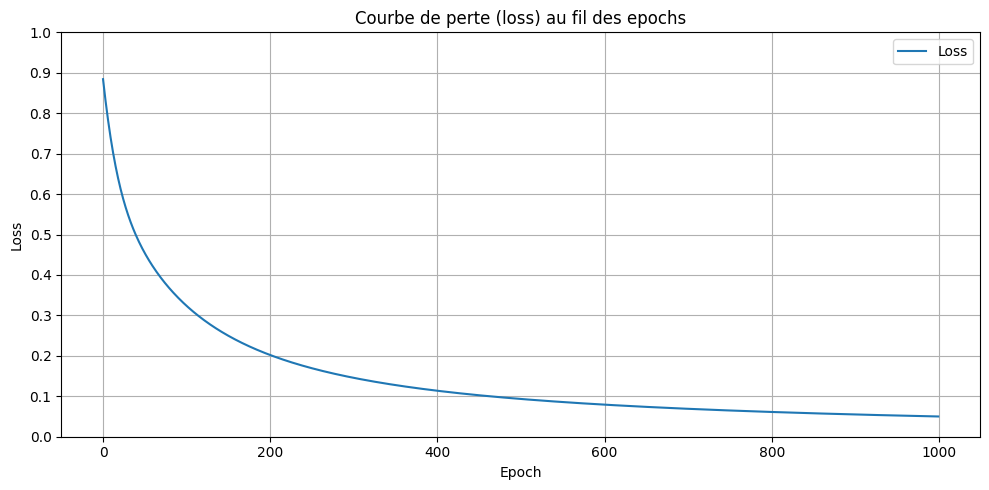

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [16]:
model = SVM(SVMKernelType.polynomial(6)) 
model.train(X.tolist(), Y.ravel().tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y.ravel()), Y_pred)}")

Accuracy Score : 1.0


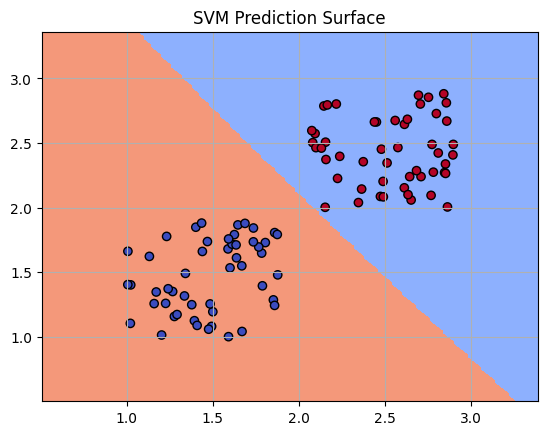

In [17]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='coolwarm_r', edgecolors='k')
plt.title("SVM Prediction Surface")
plt.grid(True)
plt.show()


### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [18]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

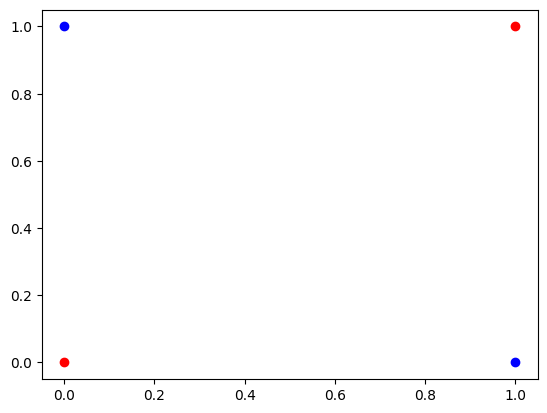

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

# RBF

In [20]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 4
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


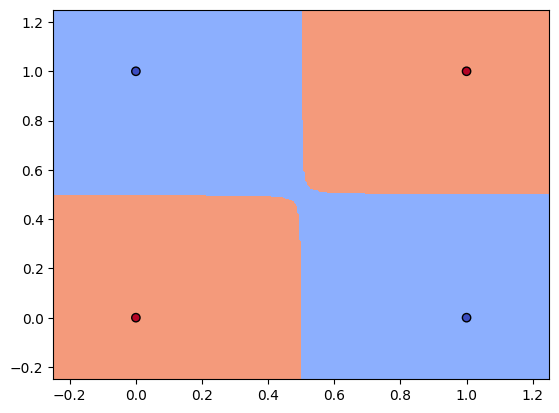

<Figure size 640x480 with 0 Axes>

In [21]:
xx, yy = np.meshgrid(np.linspace(-0.25, 1.25, 300), np.linspace(-0.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

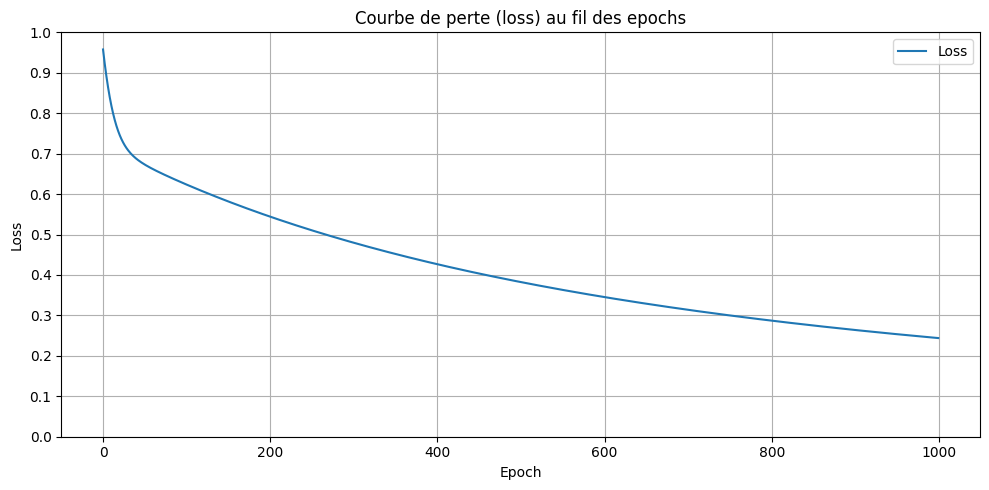

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [23]:
model = SVM(SVMKernelType.polynomial(2)) 
model.train(X.tolist(), Y.tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


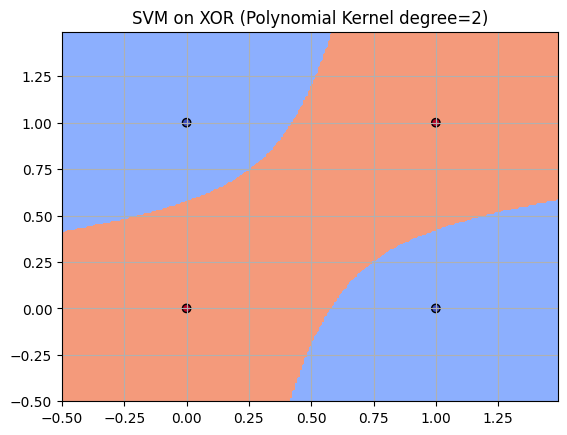

In [24]:
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap="coolwarm_r")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm_r", edgecolors='k')
plt.title("SVM on XOR (Polynomial Kernel degree=2)")
plt.grid(True)
plt.show()


























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [25]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

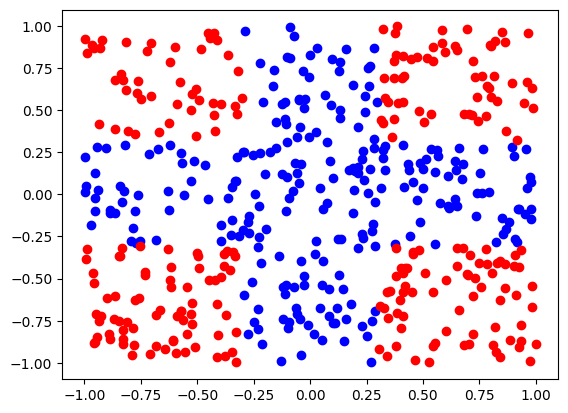

<Figure size 640x480 with 0 Axes>

In [26]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

# RBF

In [27]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 10,
    k = 100
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 0.952


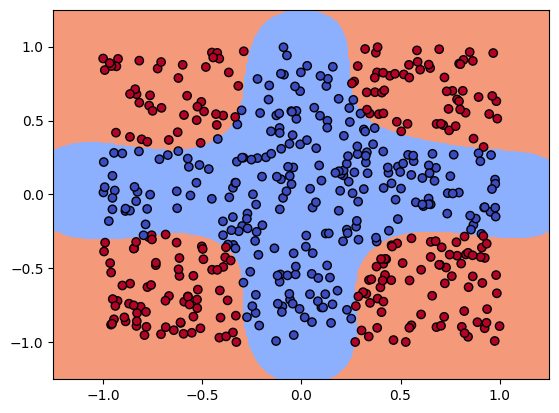

<Figure size 640x480 with 0 Axes>

In [28]:
xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

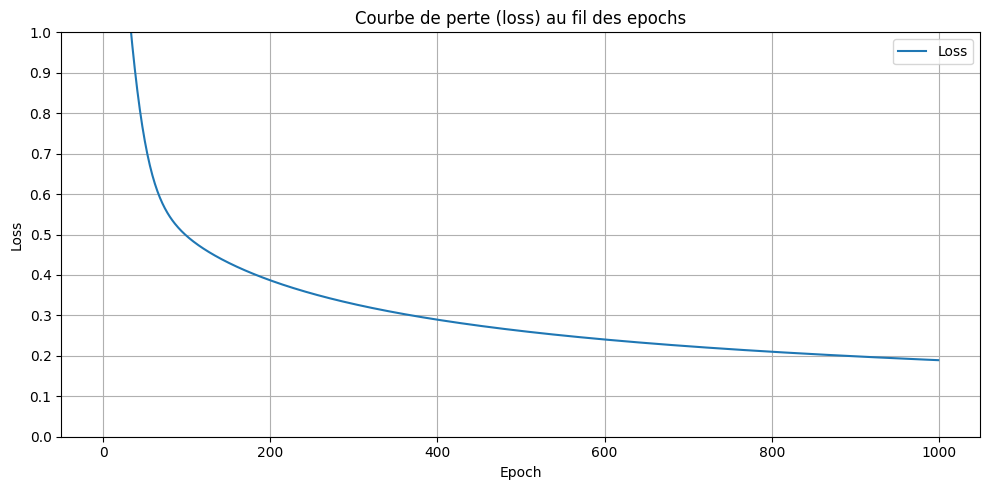

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [30]:
model = SVM(SVMKernelType.polynomial(25))
model.train(X.tolist(), Y.tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 0.962


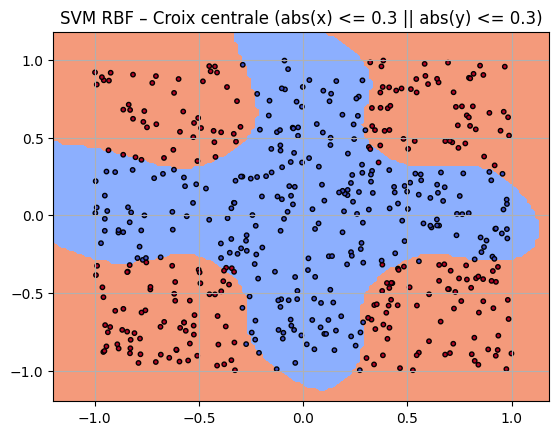

In [31]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap="coolwarm_r")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm_r", edgecolors='k', s=10)
plt.title("SVM RBF – Croix centrale (abs(x) <= 0.3 || abs(y) <= 0.3)")
plt.grid(True)
plt.show()


### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [32]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

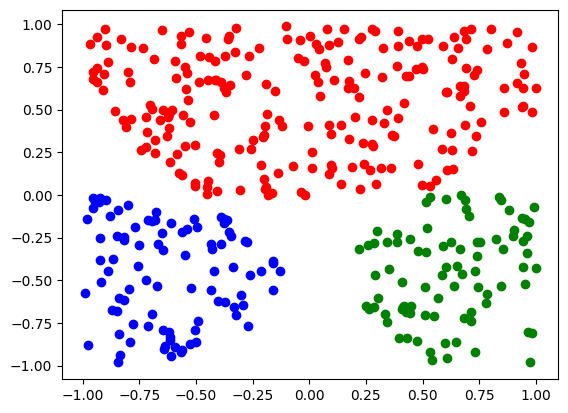

<Figure size 640x480 with 0 Axes>

In [33]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# RBF

#### Sans multi-classe

In [34]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.RBF(X, y_i, gamma=1, k=4)
    model_i.train_classification(epochs=1000, learning_rate=0.1, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_acc = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y_acc, Y_pred)}")

Accuracy score : 1.0


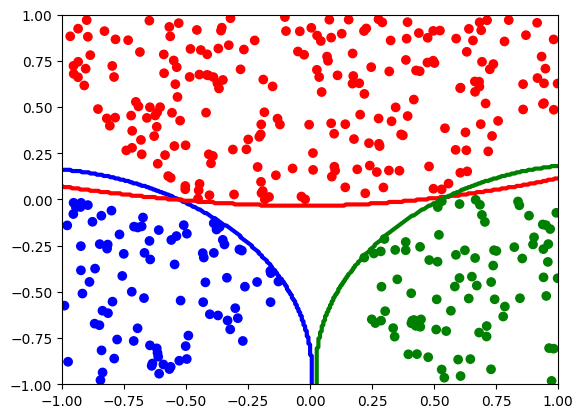

<Figure size 640x480 with 0 Axes>

In [35]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()


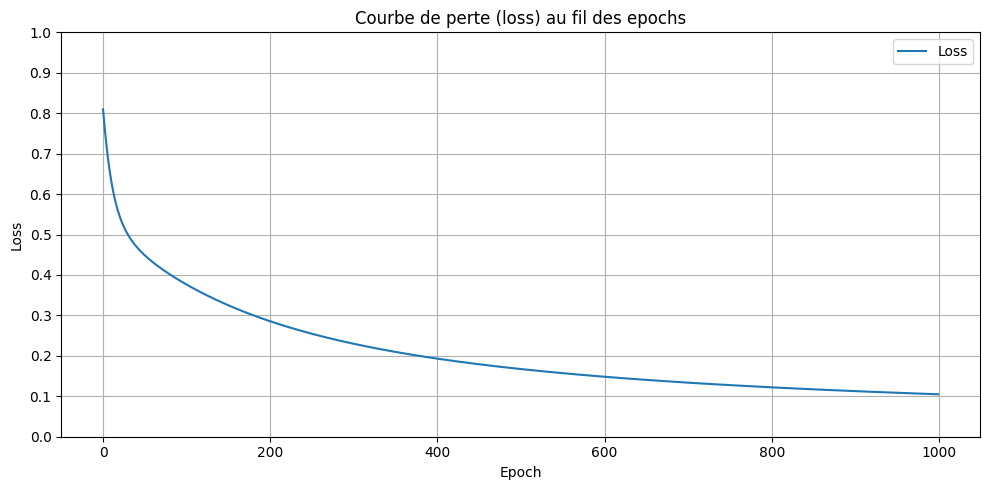

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

#### Avec multi-classe

In [37]:
new_Y = []
for line in Y:
    new_Y.append(list(line).index(1))
print(new_Y)

[2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 

In [38]:
y = projetannuel.float_labels(new_Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 4
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

Accuracy Score : 1.0


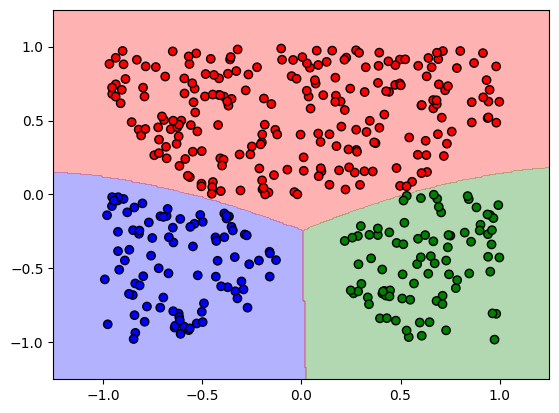

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap=cmap_custom)

plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap=cmap_custom, edgecolor='k')

plt.show()
plt.clf()


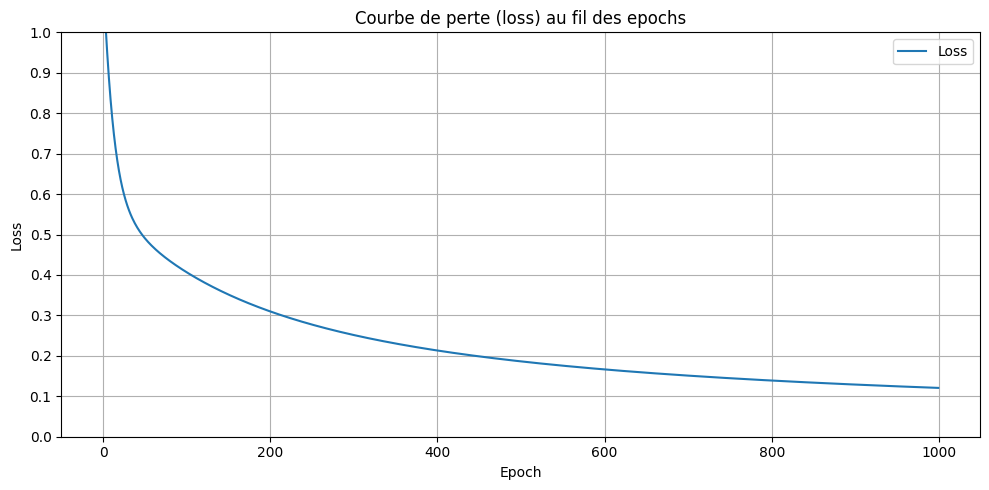

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [41]:
y_labels = np.argmax(Y, axis=1)


In [42]:
svms = []
for i in range(3):
    y_bin = [1.0 if label == i else -1.0 for label in y_labels]
    svm = SVM(SVMKernelType.rbf(1.5))
    svm.train(X.tolist(), y_bin)
    svms.append(svm)


In [43]:
def predict_ova(svms, X):
    preds = []
    for x in X:
        scores = [svm.predict([x])[0] for svm in svms]
        preds.append(np.argmax(scores))
    return preds

y_pred = predict_ova(svms, X)


In [44]:
print(f"Accuracy Score : {projetannuel.accuracy_score(list(y_labels), y_pred)}")


Accuracy Score : 1.0


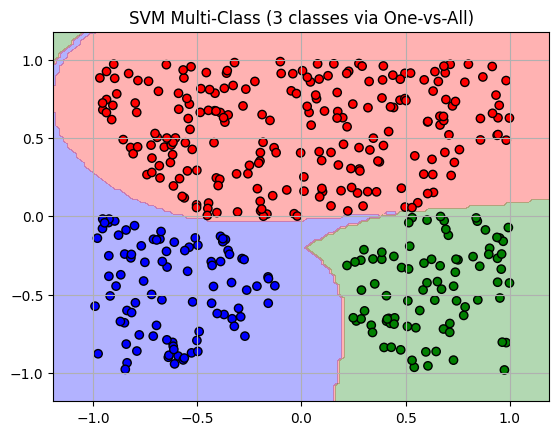

In [ ]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_ova(svms, grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap=cmap_custom, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap=cmap_custom, edgecolors="k")
plt.title("SVM Multi-Class (3 classes via One-vs-All)")
plt.grid(True)
plt.show()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [46]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

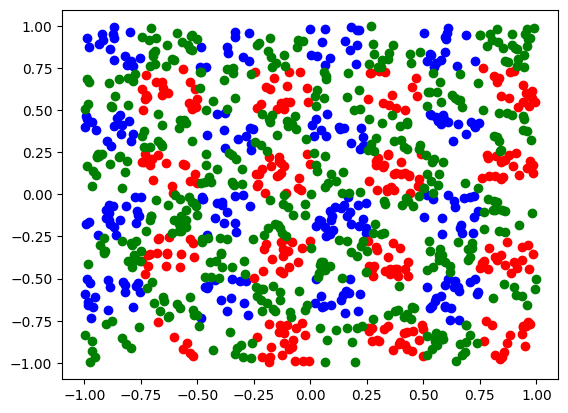

<Figure size 640x480 with 0 Axes>

In [47]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# RBF

#### Sans multi-classe

In [48]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.RBF(X, y_i, gamma=8, k=30)
    model_i.train_classification(epochs=10_000, learning_rate=0.05, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_acc = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y_acc, Y_pred)}")

Accuracy score : 0.47


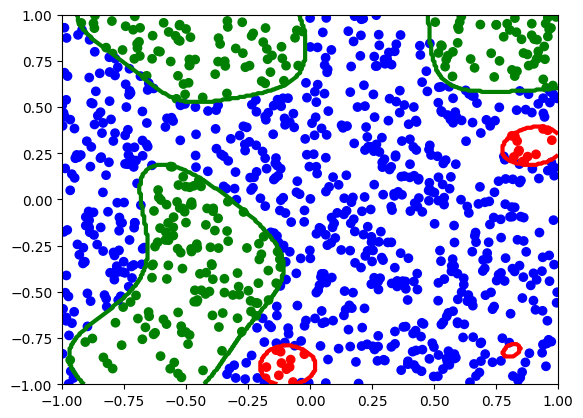

<Figure size 640x480 with 0 Axes>

In [49]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()


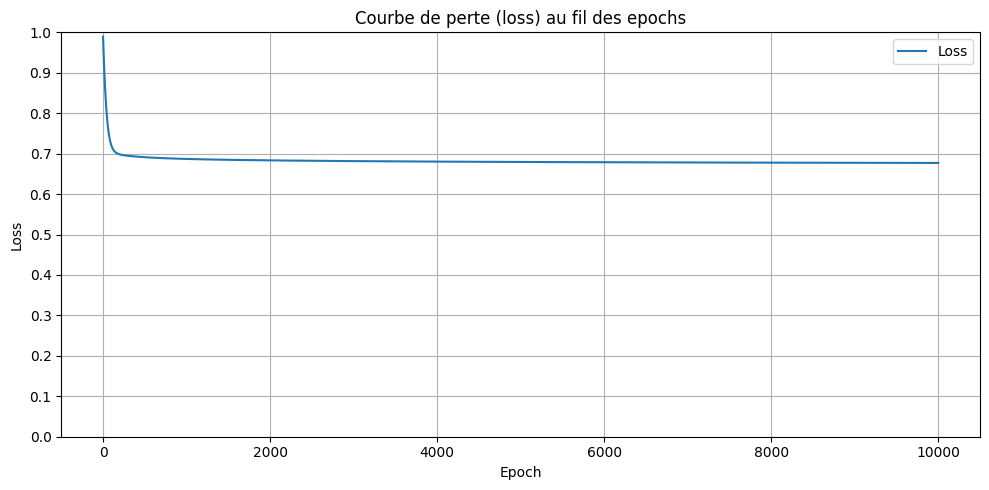

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

#### Avec multi-classe

In [51]:
new_Y = []
for line in Y:
    new_Y.append(list(line).index(1))
print(new_Y)

[2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 

In [52]:
y = projetannuel.float_labels(new_Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 8,
    k = 30
)

model.train_classification(epochs=10_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

Accuracy Score : 0.497


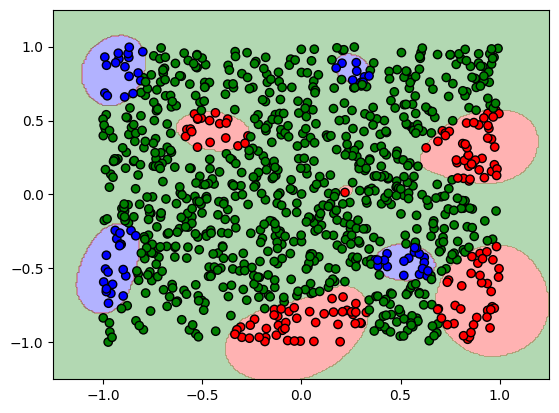

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap=cmap_custom)

plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap=cmap_custom, edgecolor='k')

plt.show()
plt.clf()

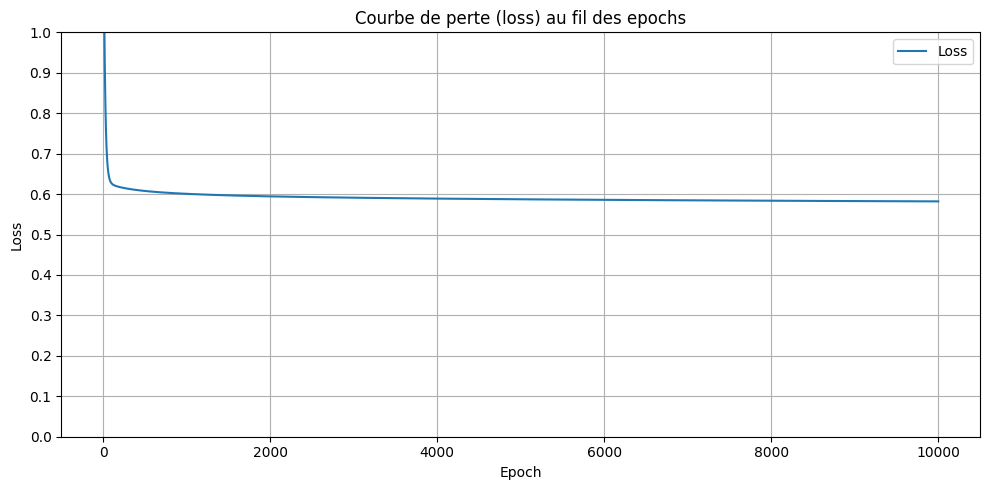

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [55]:
y_labels = np.argmax(Y, axis=1)


svms = []
for i in range(3):
    y_bin = [1.0 if label == i else -1.0 for label in y_labels]
    svm = SVM(SVMKernelType.rbf(10.0))  
    svm.train(X.tolist(), y_bin)
    svms.append(svm)

def predict_ova(svms, X):
    return [np.argmax([svm.predict([x])[0] for svm in svms]) for x in X]

y_pred = predict_ova(svms, X)
print(f"Accuracy Score : {projetannuel.accuracy_score(list(y_labels), y_pred)}")


Accuracy Score : 0.591


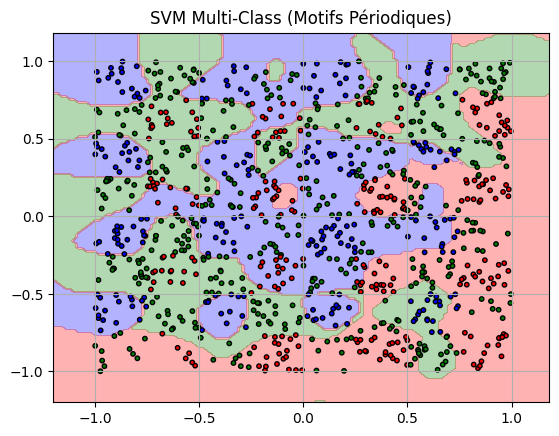

In [56]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_ova(svms, grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap=cmap_custom, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap=cmap_custom, edgecolors="k", s=10)
plt.title("SVM Multi-Class (Motifs Périodiques)")
plt.grid(True)
plt.show()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [57]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      10,
      5
])

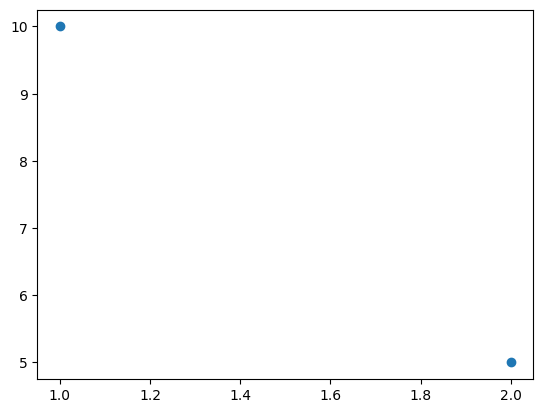

<Figure size 640x480 with 0 Axes>

In [58]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# RBF

In [59]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 5,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.00028374956101552545
RMSE : 0.016844867497713523


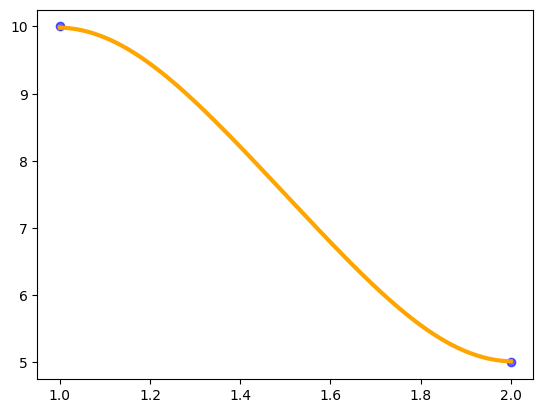

<Figure size 640x480 with 0 Axes>

In [60]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

# SVM

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [61]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

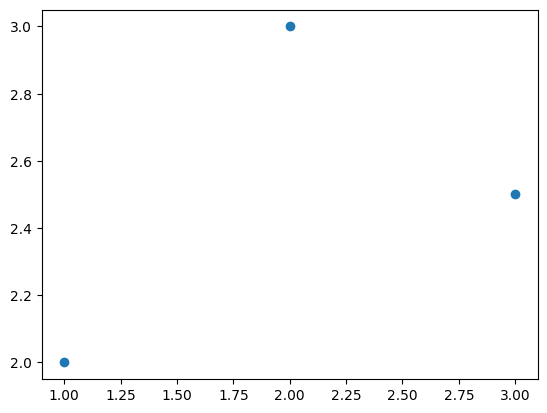

<Figure size 640x480 with 0 Axes>

In [62]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# RBF

In [63]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.3160829435437214e-28
RMSE : 1.1472065827669057e-14


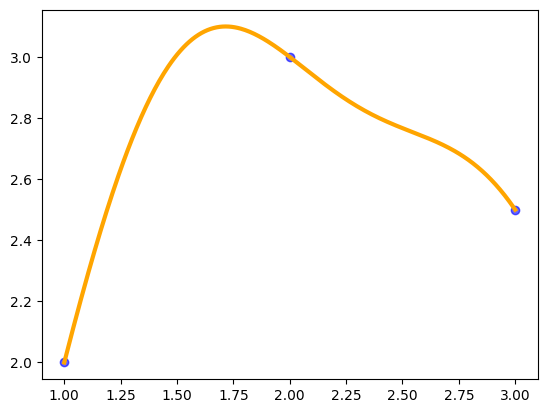

<Figure size 640x480 with 0 Axes>

In [64]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

# SVM

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [65]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

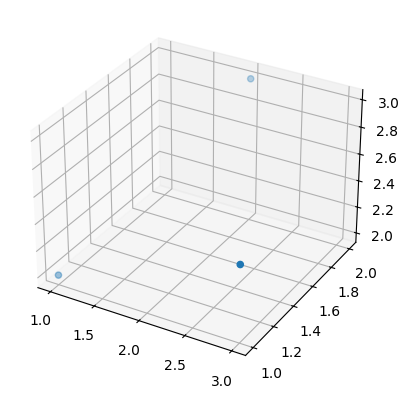

<Figure size 640x480 with 0 Axes>

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [67]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.3796125417775203e-26
RMSE : 1.1745690876987699e-13


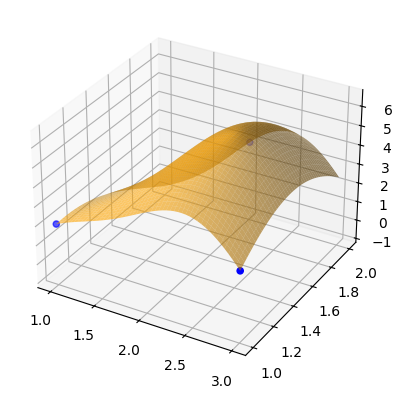

<Figure size 640x480 with 0 Axes>

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# SVM

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [69]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

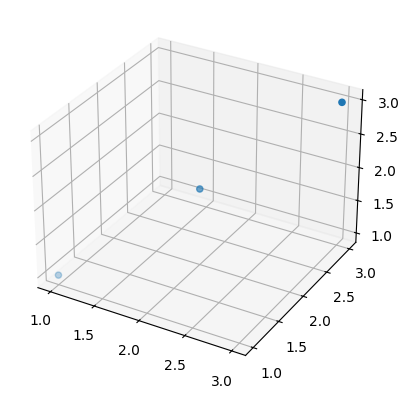

<Figure size 640x480 with 0 Axes>

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [71]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 0.1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 6.886098318491749e-28
RMSE : 2.6241376332981753e-14


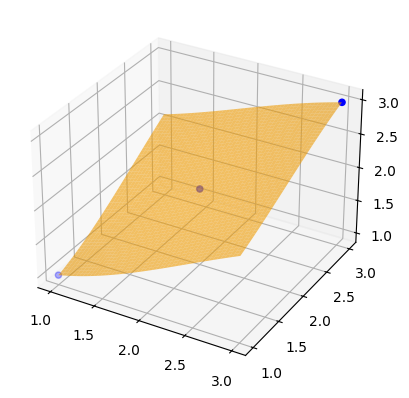

<Figure size 640x480 with 0 Axes>

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# SVM

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [73]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

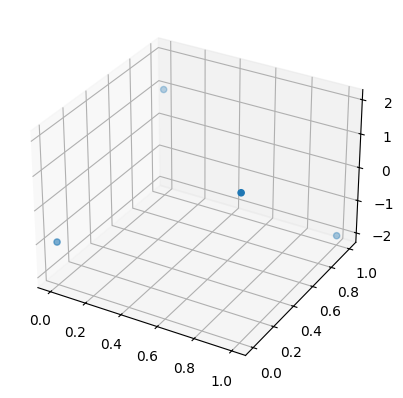

<Figure size 640x480 with 0 Axes>

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [75]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 30,
    k = 4
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 2.7187500000011053
RMSE : 1.64886324478445


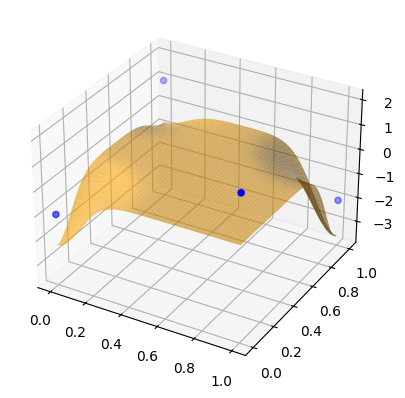

<Figure size 640x480 with 0 Axes>

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# SVM